<a href="https://colab.research.google.com/github/Gianuzzi/Proc_de_Img_-DD2020/blob/main/Ejercicio1.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs

In [1]:
# Libs (no tocar)
import os
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    from subprocess import getoutput
    getoutput("git clone -l -s https://gist.github.com/Gianuzzi/8500100a094ade398c55b827e55c6a3a cloned-repo")
    os.chdir('cloned-repo')
    import libs_PI
    os.chdir('/content')
    
from libs_PI import *

# Carga de imágenes

Se deben otorgar los ``path`` a los archivos. Pueden ser paths del ordenador, o URLs de las imágenes.

En caso de que alguna sea una URL, debe estar permitido el acceso a ella; de caso contrario, surgirá un error [HTTP_403](https://es.wikipedia.org/wiki/HTTP_403)

Por Default se intenta leer una imagen JPG; en caso de que sea otro formato, especificarlo. 

Formatos disponibles: **['png',  'jpeg', 'webp', 'bmp', 'dib', 'jpe', 'jp2',  'pbm', 'pgm', 'ppm', 'pxm', 'jpg', 'pnm']**

Se normaliza la imagen 1.
Se normaliza la imagen 2.
Tamaño de la imagen 1: (1080, 1920, 3)
Tamaño de la imagen 2: (1063, 1600, 3)


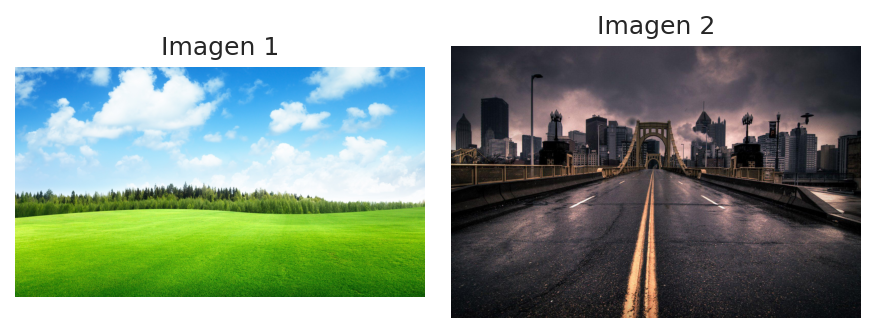

In [2]:
# Imagen 1 (definir path y formato)
path1    = 'https://selfgrowth.info/photos/top-landscape-wallpapers-without-copyright/big-landscape-illustrations-HD2616.jpg'
formato2 = 'jpg'

# Imagen 2 (definir path y formato)
path2    = 'https://wallpapercave.com/wp/wp2711831.jpg'
formato1 = 'jpg'



# Si estamos en colab, debe ser un URL.
if in_colab:
    from urllib.request import urlopen
    try:
        urlopen(path)
        getoutput("wget -O Imagen1 " + path1)
        path1 = os.path.join(os.getcwd(), 'Imagen1')
    except:
        print('No se pudo descargar la imagen 1.')
        print('Puede que la URL está mal escrita,'+ \
              ' o que el acceso a ella esté prohibido.')
    try:
        urlopen(path)
        getoutput("wget -O Imagen2 " + path2)
        path2 = os.path.join(os.getcwd(), 'Imagen2')
    except:
        print('No se pudo descargar la imagen 2.')
        print('Puede que la URL está mal escrita,'+ \
              ' o que el acceso a ella esté prohibido.')

# Cargamos los archivos
img1 = mpimg.imread(path1, format=formato1)
img2 = mpimg.imread(path2, format=formato2)

# Definimos RGB normalizados
## Imagen 1
if img1.ravel().dtype not in (float, 'float32'): 
    print('Se normaliza la imagen 1.')
    img1 = img1/255.
if (len(img1.shape)==3) and (img1.shape[2]==4):
    img1 = RGBAtoRGB(img1, verb=True)
## Imagen 2
if img2.ravel().dtype not in (float, 'float32'): 
    print('Se normaliza la imagen 2.')
    img2 = img2/255.
if (len(img2.shape)==3) and (img2.shape[2]==4):
    img2 = RGBAtoRGB(img2, verb=True)

print('Tamaño de la imagen 1:', img1.shape)
print('Tamaño de la imagen 2:', img2.shape)

# Luminancias?
## Imagen 1
if len(img1.shape)==2:
    print('Parece que la imagen 1 no presenta colores.\n'+\
          '\t Se considera que es una imagen de luminancias.')
    print('Para operar, se convierte a imagen RGB')
    img1 = np.repeat(img1[:,:,np.newaxis], 3, axis=2)
    
## Imagen 2
if len(img2.shape)==2:
    print('Parece que la imagen 2 no presenta colores.\n'+\
          '\t Se considera que es una imagen de luminancias.')
    print('Para operar, se convierte a imagen RGB')
    img2 = np.repeat(img2[:,:,np.newaxis], 3, axis=2)

# Ploteo
plt.figure(dpi=150)
plt.subplot(1,2,1)
plt.title('Imagen 1')
plt.axis('off')
plt.imshow(img1)
plt.subplot(1,2,2)
plt.title('Imagen 2')
plt.axis('off')
plt.imshow(img2)
plt.tight_layout()
plt.show()

# Pre-Procesado - Transformaciones espaciales básicas

En esta sección se realizarán las operaciones deseadas, antes de poder realizar operaciones aritméticas. 

Es importante saber que se requiere de forma obligatoria que, al final del preprocesado, ambas imágenes tengan el **mismo tamaño**. De caso contraro, se permitirá realizar corte o rellenado (según se especifique)


_Organización:_

    1) Ediciones individuales:
        - Corte (Definiendo límites de escala de píxeles (según su eje), respecto a la esquina inferior izquierda)
        - Inversión de ejes (x , y)
        - Rotación (90° antihorario)
    2) Edición conjunta

## Ediciones individuales

    Parámetros:
    ----------
    x_min : Posición porcentual [0,x_max), del borde izquierdo
             nuevo, respecto a la imagen original.
    x_max : Posición porcentual (x_min,1], del borde derecho
             nuevo, respecto a la imagen original.
    y_min : Posición porcentual [0,y_max), del borde inferior
             nuevo, respecto a la imagen original.
    y_max : Posición porcentual (y_min,1], del borde superior
             nuevo, respecto a la imagen original.
    x_inv : Inevrtir imagen en x. (Bool)
    y_inv : Inevrtir imagen en y. (Bool)
    rot   : Rotar imagen 90° en sentido antihorario. (Bool)

Imagen 1
Se recortó la imagen.
Se invirtió la imagen.
Se rotó la imagen.

Imagen 2
Se recortó la imagen.
Se invirtió la imagen.


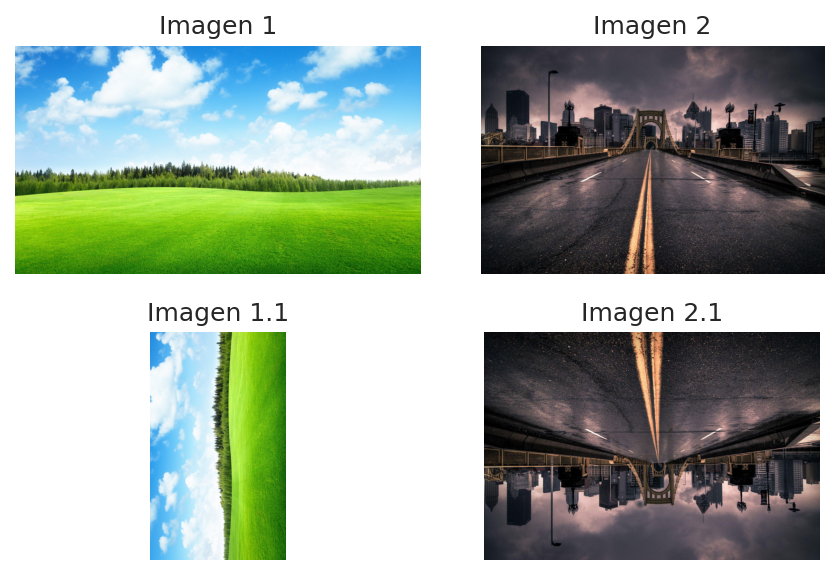

In [3]:
# Imagen 1
## Parámetros (Modificar a gusto)
x_min = 0.1
x_max = 0.95
y_min = 0
y_max = 0.9
x_inv = True
y_inv = False
rot   = True

## Edición (no tocar)
print('Imagen 1')
img1_t = Transform_IMG(img1,
                       x_min=x_min, x_max=x_max,
                       y_min=y_min, y_max=y_max, 
                       x_inv=x_inv, y_inv=y_inv,
                       rot=rot, verb=True)

print('')
# Imagen 2
## Parámetros (Modificar a gusto)
x_min = 0.01
x_max = 0.94
y_min = 0
y_max = 0.95
x_inv = False
y_inv = True
rot   = False

## Edición (no tocar)
print('Imagen 2')
img2_t = Transform_IMG(img2,
                       x_min=x_min, x_max=x_max,
                       y_min=y_min, y_max=y_max, 
                       x_inv=x_inv, y_inv=y_inv,
                       rot=rot, verb=True)


# Ploteo (no tocar)
plt.figure(dpi=150)
plt.subplot(2,2,1)
plt.title('Imagen 1')
plt.axis('off')
plt.imshow(img1)
plt.subplot(2,2,2)
plt.title('Imagen 2')
plt.axis('off')
plt.imshow(img2)
plt.subplot(2,2,3)
plt.title('Imagen 1.1')
plt.axis('off')
plt.imshow(img1_t)
plt.subplot(2,2,4)
plt.title('Imagen 2.1')
plt.axis('off')
plt.imshow(img2_t)
plt.tight_layout()
plt.show()

## Edición conjunta - Seteo de tamaño

**Ambas imágenes deben ser del mismo tamaño para realizar las operaciones.**

El proceso será el siguiente (Ordenadas según orden de ejecución):

    1) Ancho/Alto
        - Se selecciona (entre las 2 imágenes) cuál será el Ancho y el Alto de ambas. (Ej.: Ancho de Imagen 1, Alto de Imagen 2). 
            También se puede poner un valor de alto y otro de ancho, en píxeles.
    2) Cambio de tamaño (Opcional)
        - Si se quiere, se aumenta/disminye el tamaño de cada imagen, hasta alcancar el Ancho/Alto definido.
            Se mantiene el aspecto (ratio).
    3) Rellenado/Corte
        - En caso de aún existir diferencia de tamaños, se permite:
            a) Cortar la sección extra de una imagen si esta se excede.
            b) Rellenar la sección faltante con algún color RGB si esta "se queda chica".
            
Notesé que, si a no se especifica la operación _corte_ (**CROP**) y/o _rellenado (**FILL**),
la imagen puede que no termine con el tamaño especificado.
            
    Parámetros:
    -----------
    width : Ancho en píxeles a setear ambas imágenes. 
            Si width==None, ambas conservan el ancho.
            Si width=='first' o 'second', se utiliza el ancho de
            la imagen 1 o 2, para ambas imágenes. (int/str)
    height: Alto en píxeles a setear ambas imágenes.
            Si height==None, ambas conservan el alto.
            Si height=='first' o 'second', se utiliza el alto de
            la imagen 1 o 2, para ambas imágenes. (int/str)
    resize: Expandir/Contraer la imagen, conservando el aspecto 
             original (height/width == cte). (bool)
    crop  : Aplicar recorte de excedente a la imagen. (bool)
    fill  : Aplicar rellenado de faltante, para alcanzar el tamaño
             especificado. 
            Se puede definir una tupla o lista de 3 valores
             (R,G,B), del color a rellenar, o su nombre (en
             inglés), en formato string (Ej.: 'red', 'green'),
             capaz de ser manipulado por matplotlib. 
            Si fill==True se rellena con negro. (tuple/list)

Transformando Imagen 1...
[Ancho, Alto] buscado: 973 1010
Tamaño inicial: (973, 1632)
Aplicado corte: (973, 1632) --> (973, 1010)
Aplicado rellenado: (973, 1010) --> (973, 1010)
	 Color utilizado: (255, 255, 255)

 Tamaño final: (973, 1010)

 Transformando Imagen 2...
[Ancho, Alto] buscado: 973 1010
Tamaño inicial: (1488, 1010)
Aplicado corte: (1488, 1010) --> (973, 1010)
Aplicado rellenado: (973, 1010) --> (973, 1010)
	 Color utilizado: (200, 2, 18)

 Tamaño final: (973, 1010)


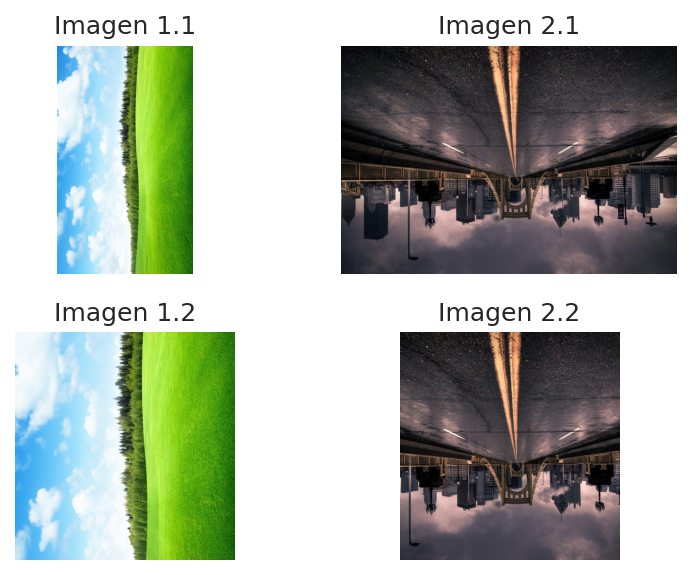

Tamaño de la imagen 1.2: (1010, 973, 3)
Tamaño de la imagen 2.2: (1010, 973, 3)


In [4]:
# Definimos ancho y alto común de AMBAS imágenes
## Puede ser el ancho/alto de alguna, o un valor numérico en píxeles.
height = 'second'  # 'first' refiere al ancho/alto de la imagen 1 
width  = 'first' # 'second' refiere al ancho/alto de la imagen 2


# Parámetros de edición (Modificar a gusto)

## Imagen 1
resize_1 = False
crop_1   = True
fill_1   = [255,255,255]#'blue'

## Imagen 2
resize_2 = False
crop_2   = True
fill_2   = [200,2,18]



# Edición (no tocar)
img1_e, img2_e = Resize2IMGs(img1_t, img2_t,
                             width=width, height=height,
                             resize_1=resize_1, resize_2=resize_2,
                             crop_1=crop_1, crop_2=crop_2,
                             fill_1=fill_1, fill_2=fill_2,
                             normed_1=True, normed_2=True,
                             verb=True)



#Ploteo (no tocar)
plt.figure(dpi=150)
plt.subplot(2,2,1)
plt.title('Imagen 1.1')
plt.axis('off')
plt.imshow(img1_t)
plt.subplot(2,2,2)
plt.title('Imagen 2.1')
plt.axis('off')
plt.imshow(img2_t)
plt.subplot(2,2,3)
plt.title('Imagen 1.2')
plt.axis('off')
plt.imshow(img1_e)
plt.subplot(2,2,4)
plt.title('Imagen 2.2')
plt.axis('off')
plt.imshow(img2_e)
plt.tight_layout()
plt.show()

print('Tamaño de la imagen 1.2:', img1_e.shape)
print('Tamaño de la imagen 2.2:', img2_e.shape)

# Guardado

In [5]:
# Imagen 1
nombre1  = 'IMG1_Ej1.4'
formato1 = 'jpg'

if not in_colab:
    IMG = Image.fromarray((img1_e*255).astype('uint8'))
    IMG.save(nombre1+'.'+formato1)


# Imagen 2
nombre2  = 'IMG2_Ej1.4'
formato2 = 'jpg'

if not in_colab:
    IMG = Image.fromarray((img2_e*255).astype('uint8'))
    IMG.save(nombre2+'.'+formato2)

# Check

In [6]:
if img1_e.shape != img2_e.shape:
    print('Los tamaños son distintos. No se podrán realizar operaciones algebraicas.')
    raise ValueError('Aplique otra edición a alguna imagen para obtener el mismo tamaño en ambas.')

# Álgebra

    Las operaciones (píxel a píxel) disponibles son:
        - suma    ['suma',      'sum',       '+']
        - resta   ['resta',     'subtract',  '-']
        - lighter ['mas_claro', 'if_lighter']
        - darker  ['mas_oscuro','if_darker' ]
    Los formatos (cierres) disponible son:
        - RGB clampeado ['RGB_truncado', 'RGB_clamp'  ]
        - RGB promedio  ['RGB_promedio', 'RGB_average']
        - YIQ clampeado ['YIQ_truncado', 'YIQ_clamp'  ] 
        - YIQ promedio  ['YIQ_promedio', 'YIQ_average ]
        - Ninguno       [None] (OBLIGATORIO si se opera
                                 con lighter/darker)
    
    Nota: Al operar en el espacio YIQ, en TODOS los casos
           se termina la operación clampeando las 3 
           componentes en sus respectivos límites.
           
    Algoritmos (en cada píxel):
        |   op    |   fo   |
        ---------------------
        - "suma"  | "RGB_clamp":
            R, G, B := (R1+R2, G1+G2, B1+B2)
        - "resta" | "RGB_clamp":
            R, G, B := (R1-R2, G1-G2, B1-B2)
        - "suma"  | "RGB_promedio":
            R, G, B := (R1+R2, G1+G2, B1+B2)/2.
        - "resta" | "RGB_promedio":
            R, G, B := (R1-R2, G1-G2, B1-B2)/2.
        - "suma"  | "YIQ_clamp":
            Y := (Y1 + Y2)
            I := (Y1 * I1 - Y2 * I2) / (Y1 + Y2)
            Q := (Y1 * Q1 - Y2 * Q2) / (Y1 + Y2)
        - "resta" | "YIQ_clamp":
            Y := (Y1 - Y2)
            I := (Y1 * I1 - Y2 * I2) / (Y1 - Y2)
            Q := (Y1 * Q1 - Y2 * Q2) / (Y1 - Y2)
        - "suma"  | "YIQ_promedio":
            Y := (Y1 + Y2)/2.
            I := (Y1 * I1 - Y2 * I2) / (Y1 + Y2)
            Q := (Y1 * Q1 - Y2 * Q2) / (Y1 + Y2)
        - "resta" | "YIQ_promedio":
            Y := (Y1 - Y2)/2.
            I := (Y1 * I1 - Y2 * I2) / (Y1 - Y2)
            Q := (Y1 * Q1 - Y2 * Q2) / (Y1 - Y2)
        - "mas_claro"
            if Y1 > Y2:
                Y, I, Q := Y1, I1, Q1
            else:
                Y, I, Q := Y2, I2, Q2
        - "mas_oscuro"
            if Y1 < Y2:
                Y, I, Q := Y1, I1, Q1
            else:
                Y, I, Q := Y2, I2, Q2

## Operación

Se ha transformado de YIQ a RGB
Se realizó la operación: suma 
	utilizando el ciere: YIQ_average


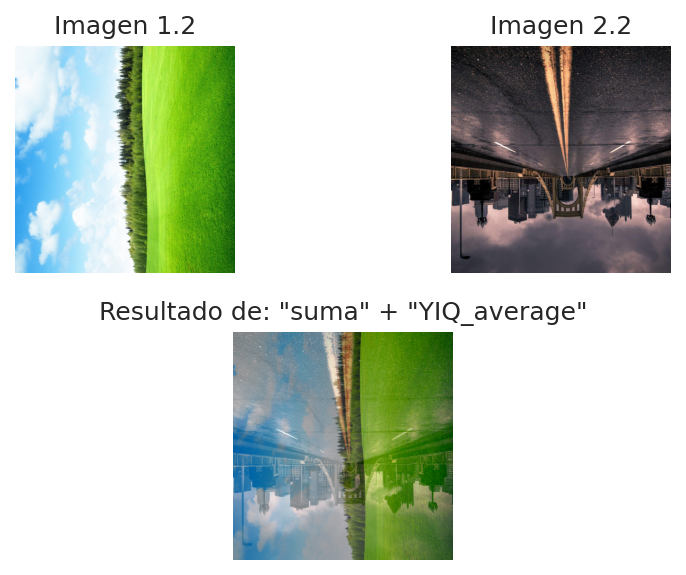

In [7]:
# Parámetros  (Modificar a gusto)
operation = 'suma'
formato   = 'YIQ_average'


# Operación (no tocar)
img_op = Algebra_IMGs(img1_e, img2_e,
                      op=operation, fo=formato,
                      verb=True)


# Ploteo (no tocar)
fig  = plt.figure(dpi=150)
grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)

fig1 = fig.add_subplot(grid[0, 0])
fig1.imshow(img1_e)
fig1.axis('off')
fig1.set_title('Imagen 1.2')
fig2 = fig.add_subplot(grid[0, 1])
fig2.imshow(img2_e)
fig2.axis('off')
fig2.set_title('Imagen 2.2')
fig3 = fig.add_subplot(grid[1, :])
fig3.imshow(img_op)
fig3.axis('off')
fig3.set_title('Resultado de: "' + operation +
               '" + "' + formato +'"')
grid.tight_layout(fig)
plt.show()

# Guardado

Se debe especificar el nombre y formato.

In [8]:
nombre  = 'IMG_Ej1.4'
formato = 'jpg'

if not in_colab:
    RGB_op = (img_op*255.).astype('uint8')
    IMG    = Image.fromarray(RGB_op)
    IMG.save(nombre+'.'+formato)